<a href="https://colab.research.google.com/github/sebasatarama/PC2_AAI_DiegoAtarama/blob/main/code/EJ1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%file abz7
20 15
 2 24  3 12  9 17  4 27  0 21  6 25  8 27  7 26  1 30  5 31 11 18 14 16 13 39 10 19 12 26
 6 30  3 15 12 20 11 19  1 24 13 15 10 28  2 36  5 26  7 15  0 11  8 23 14 20  9 26  4 28
 6 35  0 22 13 23  7 32  2 20  3 12 12 19 10 23  9 17  1 14  5 16 11 29  8 16  4 22 14 22
 9 20  6 29  1 19  7 14 12 33  4 30  0 32  5 21 11 29 10 24 14 25  2 29  3 13  8 20 13 18
11 23 13 20  1 28  6 32  7 16  5 18  8 24  9 23  3 24 10 34  2 24  0 24 14 28 12 15  4 18
 8 24 11 19 14 21  1 33  7 34  6 35  5 40 10 36  3 23  2 26  4 15  9 28 13 38 12 13  0 25
13 27  3 30  6 21  8 19 12 12  4 27  2 39  9 13 14 12  5 36 10 21 11 17  1 29  0 17  7 33
 5 27  4 19  6 29  9 20  3 21 10 40  8 14 14 39 13 39  2 27  1 36 12 12 11 37  7 22  0 13
13 32 11 29  8 24  3 27  5 40  4 21  9 26  0 27 14 27  6 16  2 21 10 13  7 28 12 28  1 32
12 35  1 11  5 39 14 18  7 23  0 34  3 24 13 11  8 30 11 31  4 15 10 15  2 28  9 26  6 33
10 28  5 37 12 29  1 31  7 25  8 13 14 14  4 20  3 27  9 25 13 31 11 14  6 25  2 39  0 36
 0 22 11 25  5 28 13 35  4 31  8 21  9 20 14 19  2 29  7 32 10 18  1 18  3 11 12 17  6 15
12 39  5 32  2 36  8 14  3 28 13 37  0 38  6 20  7 19 11 12 14 22  1 36  4 15  9 32 10 16
 8 28  1 29 14 40 12 23  4 34  5 33  6 27 10 17  0 20  7 28 11 21  2 21 13 20  9 33  3 27
 9 21 14 34  3 30 12 38  0 11 11 16  2 14  5 14  1 34  8 33  4 23 13 40 10 12  6 23  7 27
 9 13 14 40  7 36  4 17  0 13  5 33  8 25 13 24 10 23  3 36  2 29  1 18 11 13  6 33 12 13
 3 25  5 15  2 28 12 40  7 39  1 31  8 35  6 31 11 36  4 12 10 33 14 19  9 16 13 27  0 21
12 22 10 14  0 12  2 20  5 12  1 18 11 17  8 39 14 31  3 31  7 32  9 20 13 29  4 13  6 26
 5 18 10 30  7 38 14 22 13 15 11 20  9 16  3 17  1 12  2 13 12 40  6 17  8 30  4 38  0 13
 9 31  8 39 12 27  1 14  5 33  3 31 11 22 13 36  0 16  7 11 14 14  4 29  6 28  2 22 10 17

Writing abz7


In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
def randRep(n, m):
    rep = [i for i in range(n)]*m
    pos = []
    random.shuffle(rep)
    rep = np.array(rep)
    for i in range(n):
        pos.append((rep == i).nonzero()[0].tolist())
    return rep, np.array(pos)

In [5]:
def calcMakespan(rep, n, m, jobs):
    mstart = np.zeros((m), dtype=int)
    jend = np.zeros((n), dtype=int)
    idxs = np.zeros((n), dtype=int)
    makespan = 0
    for e in rep:
        i = idxs[e]
        idxs[e] += 1
        midx = jobs[e, i, 0]
        time = jobs[e, i, 1]
        #print(f"Job {e} task {i} to machine {midx} starting at {mstart[midx]} duration {time}")
        mstart[midx] = max(mstart[midx], jend[e]) + time
        jend[e] = mstart[midx]
        if mstart[midx] > makespan:
            makespan = mstart[midx]

    return makespan

In [6]:
def mkSolution(rep, n, m, jobs, makespan):
    mstart = np.zeros((m), dtype=int)
    jend = np.zeros((n), dtype=int)
    idxs = np.zeros((n), dtype=int)
    schedule = np.zeros((m*10, makespan))

    for e in rep:
        i = idxs[e]
        idxs[e] += 1
        midx = jobs[e, i, 0]
        time = jobs[e, i, 1]
        mstart[midx] = max(mstart[midx], jend[e])
        schedule[midx*10:(midx+1)*10, mstart[midx]:mstart[midx] + time] = e+1
        mstart[midx] += time
        jend[e] = mstart[midx]

    plt.subplots(figsize=(20, 10))
    plt.imshow(schedule)

In [7]:
def nswap(rep, pos, n, m, debug=False):
    numswaps = 2
    while numswaps < n - 1:
        if random.randint(1, 2) == 1:
            break
        else:
            numswaps += 1
    if debug: print(numswaps)
    jobs = random.sample(range(n), numswaps)
    if debug: print(jobs)
    for k in range(numswaps - 1):
        i0 = random.randint(0, m-1)
        j0 = random.randint(0, m-1)
        i = pos[jobs[k], i0]
        j = pos[jobs[k+1], j0]
        if debug: print(i0, j0, i, j)
        rep[i], rep[j] = rep[j], rep[i]
        pos[jobs[k], i0], pos[jobs[k+1], j0] = pos[jobs[k+1], j0], pos[jobs[k], i0]

#EA OPTIMIZADO
Basicamente, para optimizar el EA, separamos los solutions en dos, los bueno y los nuevos. Así, en vez de trabajar con todos los datos en cada iteración, solo trabajamos con la mitad. Es por eso que se logra una cantidad mucho mayor de iteraciones a la original. En 3 minutos, se logran 26 iteraciones, en la anterior, solo 10.

In [8]:
import time
import math

def ea(n, m, jobs, μ, λ, delay):
    solutions = np.zeros((μ + λ, m*n), dtype=int)
    positions = np.zeros((μ + λ, n, m), dtype=int)

    for i in range(μ + λ):
        rep, pos = randRep(n, m)
        solutions[i] = rep
        positions[i] = pos

    makespans = np.zeros((μ + λ), dtype=int)

    bestMakespan = math.inf
    bestIdx = -1

    for i in range(μ + λ):
      makespans[i] = calcMakespan(solutions[i], n, m, jobs)
    
    #EL PRIMER CAMBIO QUE HACEMOS ES CALCULAR LOS μ MEJORES FUERA DEL CICLO WHILE
    #LA FORMA DE CALCULAR LOS μ MEJORES TUVO QUE SER CAMBIADO DEBIDO A QUE DABA RESULTADOS INCORRECTOS
    idxs = [i for i in range((μ + λ))]
    μbest = [np.argpartition(makespans, μ)[:μ]][0]
    λworst = [item for item in idxs if item not in μbest] #AQUI EVITAMOS USAR UN FOR DE MAS PARA CALCULAR EL INDICE DE LOS PEORES

    #GUARDAMOS SOLO LOS MEJORES, NO NOS INTERESA GUARDAR LOS PEORES
    gsolutions = np.delete(solutions, λworst, 0)
    gpositions = np.delete(positions, λworst, 0)
    gmakespans = np.delete(makespans, λworst) 
    bestMakespan = min(list(gmakespans))
    bestIdx = list(gmakespans).index(bestMakespan)
    timesup = False
    start = time.time()
    iter = 0
    progress = []
    while not timesup:
        iter += 1       
        #CREAMOS LAS NUEVAS λ SOLUCIONES CON NSWAP
        newSolutions = gsolutions.copy()
        newPositions = gpositions.copy()
        newMakespans = np.zeros((λ), dtype=int)
        for i in range(μ):
            nswap(newSolutions[i], newPositions[i], n, m)
            newMakespans[i] = calcMakespan(newSolutions[i], n, m, jobs)

        # it is important to remember that μ and  λ are the same for this 

        #Y VOLVEMOS A CALCULAR LOS μ MEJORES

        makespans = np.concatenate((gmakespans, newMakespans))
        solutions = np.concatenate((gsolutions, newSolutions))
        positions = np.concatenate((gpositions, newPositions))

        idxs = [i for i in range((μ + λ))]
        μbest = [np.argpartition(makespans, μ)[:μ]][0]
        λworst = [item for item in idxs if item not in μbest]
        gsolutions = np.delete(solutions, λworst, 0)
        gpositions = np.delete(positions, λworst, 0)
        gmakespans = np.delete(makespans, λworst)
  
        #AQUI CALCULAMOS EL BESTMAKESPAN CON LOS ULTIMOS μ  MEJORES QUE NOS QUEDARON
        bestMakespan = min(list(gmakespans))
        bestIdx = list(gmakespans).index(bestMakespan)
        progress.append(bestMakespan)
        if time.time() - start >= delay:
          timesup = True
          break
    print(iter)
    return gsolutions[bestIdx], bestMakespan, progress

93


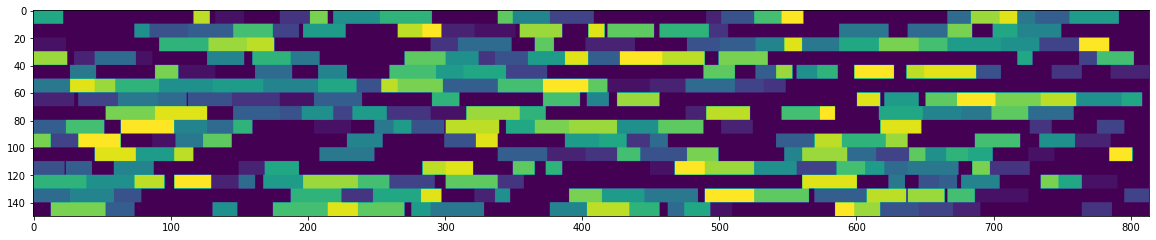

In [9]:
with open('abz7') as f:
    n, m = [int(x) for x in f.readline().split()]
    jobs = np.zeros((n, m, 2), dtype=int)
    i = 0
    for line in f:
        jobs[i] = np.array([int(x) for x in line.split()]).reshape(m, 2)
        i += 1

    random.seed(1981)
    rep, makespan, data = ea(n, m, jobs, 2**13, 2**13, 540)
    mkSolution(rep, n, m, jobs, makespan)

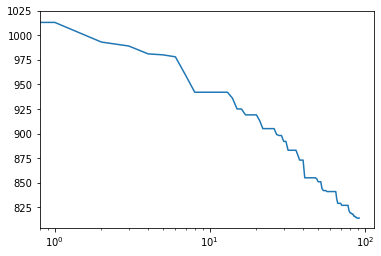

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(data)
ax.set_xscale('log')
plt.show()

In [11]:
makespan

814